<a href="https://colab.research.google.com/github/amitkrjha1994/Hakathons/blob/main/Titanic%20Kaggle/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
! pip install -q kaggle

In [121]:
!mkdir -p ~/.kaggle

In [122]:
!cp kaggle.json ~/.kaggle

In [123]:
! kaggle competitions download -c 'titanic'

gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)


In [124]:
import pandas as pd

In [125]:
train=pd.read_csv("/content/train.csv")

In [126]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
test=pd.read_csv("/content/test.csv")

In [128]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [129]:
submit=pd.read_csv("/content/gender_submission.csv")

In [130]:
submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [131]:
!pip install feature_engine

In [132]:
import feature_engine.missing_data_imputers as mdi

In [133]:
import matplotlib.pyplot as plt

In [134]:
import seaborn as sns

In [135]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [136]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


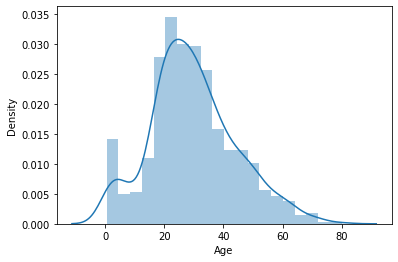

In [137]:
sns.distplot(train['Age'])

In [138]:
train['Age'].isnull().mean()*100

19.865319865319865

In [139]:
train['Cabin'].isnull().mean()*100

77.10437710437711

Since **Cabin** Column has more than 77% missing values we simply going to remove it

In [140]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

In [141]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [142]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [143]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [144]:
imputer = mdi.RandomSampleImputer(random_state=['Age'],
                          seed='observation',
                          seeding_method='add')

Although mean value is overpopulated but whole distribution seems normal

In [145]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [146]:
embarkt=pd.get_dummies(test['Embarked'],drop_first=True)
embarkt.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [147]:
train=pd.concat([train,embark],axis=1)

In [148]:
train.drop('Embarked',axis=1,inplace=True)

In [149]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,1


In [150]:
test=pd.concat([test,embarkt],axis=1)

In [151]:
test.drop('Embarked',axis=1,inplace=True)

In [152]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,1


In [153]:
sxtr=pd.get_dummies(train['Sex'],drop_first=True)
sxts=pd.get_dummies(test['Sex'],drop_first=True)

In [154]:
train.drop('Sex',axis=1,inplace=True)
test.drop('Sex',axis=1,inplace=True)
train=pd.concat([train,sxtr],axis=1)
test=pd.concat([test,sxts],axis=1)

In [155]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Q,S,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,1


In [156]:
test.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Q,S,male
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,0,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,1,0


In [157]:
train.drop(['PassengerId','Name'],axis=1,inplace=True)
test.drop(['PassengerId','Name'],axis=1,inplace=True)

In [158]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Q,S,male
0,0,3,22.0,1,0,A/5 21171,7.2500,0,1,1
1,1,1,38.0,1,0,PC 17599,71.2833,0,0,0
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0
3,1,1,35.0,1,0,113803,53.1000,0,1,0
4,0,3,35.0,0,0,373450,8.0500,0,1,1


In [159]:
test.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Q,S,male
0,3,34.5,0,0,330911,7.8292,1,0,1
1,3,47.0,1,0,363272,7.0000,0,1,0
2,2,62.0,0,0,240276,9.6875,1,0,1
3,3,27.0,0,0,315154,8.6625,0,1,1
4,3,22.0,1,1,3101298,12.2875,0,1,0


In [160]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [161]:
X.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Q,S,male
0,3,22.0,1,0,A/5 21171,7.2500,0,1,1
1,1,38.0,1,0,PC 17599,71.2833,0,0,0
2,3,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0
3,1,35.0,1,0,113803,53.1000,0,1,0
4,3,35.0,0,0,373450,8.0500,0,1,1


In [162]:
X.drop('Ticket',axis=1,inplace=True)
test.drop('Ticket',axis=1,inplace=True)

In [163]:
X=imputer.fit_transform(X)
test=imputer.transform(test)

In [164]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,3,22.0,1,0,7.2500,0,1,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,1,0
3,1,35.0,1,0,53.1000,0,1,0
4,3,35.0,0,0,8.0500,0,1,1


In [165]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [166]:
X.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
Q         0
S         0
male      0
dtype: int64

In [167]:
test.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
Q         0
S         0
male      0
dtype: int64

In [168]:
from sklearn.preprocessing import RobustScaler
rob_sc=RobustScaler()

In [169]:
X_cols=X.columns

In [170]:
test_cols=test.columns

In [171]:
X=rob_sc.fit_transform(X)
X=pd.DataFrame(X,columns=X_cols)
test=rob_sc.transform(test)
test=pd.DataFrame(test,columns=test_cols)

In [172]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,0.0,-0.434783,1.0,0.0,-0.312011,0.0,0.0,0.0
1,-2.0,0.260870,1.0,0.0,2.461242,0.0,-1.0,-1.0
2,0.0,-0.260870,0.0,0.0,-0.282777,0.0,0.0,-1.0
3,-2.0,0.130435,1.0,0.0,1.673732,0.0,0.0,-1.0
4,0.0,0.130435,0.0,0.0,-0.277363,0.0,0.0,0.0


In [173]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,0.0,0.108696,0.0,0.0,-0.286926,1.0,-1.0,0.0
1,0.0,0.652174,1.0,0.0,-0.322838,0.0,0.0,-1.0
2,-1.0,1.304348,0.0,0.0,-0.206444,1.0,-1.0,0.0
3,0.0,-0.217391,0.0,0.0,-0.250836,0.0,0.0,0.0
4,0.0,-0.434783,1.0,1.0,-0.093839,0.0,0.0,-1.0


In [174]:
from sklearn.model_selection import  train_test_split

In [175]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [176]:
from sklearn.ensemble import  RandomForestClassifier

In [177]:
rand_classifier=RandomForestClassifier(max_features='auto',min_impurity_decrease=0.0,
                                       min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1)
rand_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [178]:
pred=rand_classifier.predict(X_test)

In [179]:
from sklearn.metrics import  confusion_matrix,classification_report,accuracy_score

In [180]:
confusion_matrix(y_test,pred)

array([[96, 15],
       [18, 50]])

In [181]:
accuracy_score(y_test,pred)

0.8156424581005587

In [182]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       111
           1       0.77      0.74      0.75        68

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



In [183]:
from sklearn.ensemble import  GradientBoostingClassifier

In [184]:
gbc=GradientBoostingClassifier(n_estimators=400)

In [185]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [186]:
pred2=gbc.predict(X_test)

In [187]:
confusion_matrix(y_test,pred2)

array([[100,  11],
       [ 18,  50]])

In [188]:
accuracy_score(y_test,pred2)

0.8379888268156425

In [189]:
mean_fare=test['Fare'].mean()
test['Fare']=test['Fare'].fillna(mean_fare)

In [190]:
test.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
Q         0
S         0
male      0
dtype: int64

In [191]:
test_pred=gbc.predict(test)

In [192]:
test_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [193]:
submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [194]:
submit.drop('Survived',axis=1,inplace=True)

In [195]:
Survived=pd.DataFrame(test_pred,columns=["Survived"])

In [196]:
Survived.head()

,Survived
0,0
1,0
2,0
3,0
4,1


In [197]:
submit=pd.concat([submit,Survived],axis=1)

In [198]:
submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [199]:
submit.to_csv('submit.csv',index=False)

In [200]:
from sklearn.neighbors import KNeighborsClassifier

In [201]:
knn=KNeighborsClassifier(n_neighbors=4,weights='distance',leaf_size=40)

In [202]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=40, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [203]:
pred33=knn.predict(X_test)

In [204]:
accuracy_score(y_test,pred33)

0.770949720670391